In [2]:
!curl -o bank+marketing.zip https://archive.ics.uci.edu/static/public/222/bank+marketing.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:03 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:04 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:05 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:06 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:07 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:08 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:09 --:--:--     0
  0     0    0     0    0     0      0      0 --:--

In [3]:
import zipfile
import os

# Paths configuration
main_zip_path = "bank+marketing.zip"  # Replace with your main ZIP file path
nested_zip_path = "bank.zip"  # Nested ZIP to extract
temp_extract_dir = "temp_zip_extract"  # Temporary extraction directory
extract_to_dir = "final_extracted_files"  # Final directory for the CSV
csv_filename = "bank-full.csv"  # Specific file to extract

# Extract the nested ZIP file
with zipfile.ZipFile(main_zip_path, 'r') as main_zip:
    os.makedirs(temp_extract_dir, exist_ok=True)
    print(main_zip.namelist())
    main_zip.extract(nested_zip_path, temp_extract_dir)

print("Nested ZIP extracted.")

# Extract the specific CSV file
nested_zip_full_path = os.path.join(temp_extract_dir, nested_zip_path)

with zipfile.ZipFile(nested_zip_full_path, 'r') as nested_zip:
    print(nested_zip.namelist())
    os.makedirs(extract_to_dir, exist_ok=True)
    nested_zip.extract(csv_filename, extract_to_dir)

print(f"{csv_filename} extracted to {extract_to_dir}")


['bank.zip', 'bank-additional.zip']
Nested ZIP extracted.
['bank-full.csv', 'bank-names.txt', 'bank.csv']
bank-full.csv extracted to final_extracted_files


In [4]:
import pandas as pd

csv_file_path = os.path.join(extract_to_dir, csv_filename)

df = pd.read_csv(csv_file_path, sep=";") 

print(df.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [5]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [6]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [7]:
base = ['age', 'job', 'marital','education', 'balance', 'housing',
         'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
         'previous', 'poutcome', 'y']

df_base  = df[base]
df_base

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,1729,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,5715,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,668,no,telephone,17,nov,508,4,-1,0,unknown,no


In [8]:
df_base.isnull().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

**Question 1**

In [9]:
df_base['education'].mode()

0    secondary
Name: education, dtype: object

**Question 2**

<AxesSubplot:>

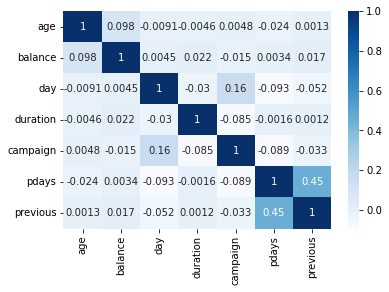

In [10]:
import seaborn as sns

matrix = df_base.corr()
sns.heatmap(matrix, cmap="Blues", annot=True)

Highest Correlation for pdays and previous

In [11]:
df_base['y']= df_base['y'].replace({'yes': 1, 'no': 0})


C:\Users\Jana\AppData\Local\Temp\ipykernel_4320\3102933430.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['y']= df_base['y'].replace({'yes': 1, 'no': 0})


In [12]:
df_base

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,1729,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,5715,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,668,no,telephone,17,nov,508,4,-1,0,unknown,0


In [13]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df_base, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

len(df_train), len(df_val), len(df_test)

(27126, 9042, 9043)

In [14]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [15]:
y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values

del df_train['y']
del df_val['y']
del df_test['y']

**Question 3**

In [16]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   balance    45211 non-null  int64 
 5   housing    45211 non-null  object
 6   contact    45211 non-null  object
 7   day        45211 non-null  int64 
 8   month      45211 non-null  object
 9   duration   45211 non-null  int64 
 10  campaign   45211 non-null  int64 
 11  pdays      45211 non-null  int64 
 12  previous   45211 non-null  int64 
 13  poutcome   45211 non-null  object
 14  y          45211 non-null  int64 
dtypes: int64(8), object(7)
memory usage: 5.2+ MB


In [17]:
categorical = ['job', 'marital','education', 'housing',
              'contact', 'month', 'poutcome']

numerical = ['age','balance','day', 'duration', 
             'campaign', 'pdays', 'previous']

In [18]:
from sklearn.metrics import mutual_info_score

def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.y)

mi = df_full_train[categorical].apply(mutual_info_churn_score)
round(mi.sort_values(ascending=False), 2)

poutcome     0.03
month        0.02
contact      0.01
housing      0.01
job          0.01
education    0.00
marital      0.00
dtype: float64

**Question 4**

In [19]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [20]:
y_train

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [21]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [22]:
y_pred = model.predict_proba(X_val)[:, 1]
decision = (y_pred >= 0.5)
acc = (y_val == decision).mean()
acc

0.9013492590134926

**Question 5**

In [23]:
corr = df_full_train[numerical].corrwith(df_full_train.y).abs()
corr.sort_values(ascending=False)

duration    0.393402
pdays       0.105742
previous    0.092051
campaign    0.072571
balance     0.052518
age         0.026684
day         0.025887
dtype: float64

In [24]:
df_base.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact',
       'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'y'],
      dtype='object')

Without age:

In [25]:
without_age = ['job', 'marital', 'education', 'balance', 'housing', 'contact',
       'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']


In [26]:
dicts_train_small = df_train[without_age].to_dict(orient='records')
dicts_val_small = df_val[without_age].to_dict(orient='records')

In [27]:
dv_age = DictVectorizer(sparse=False)
dv_age.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [28]:
dv_age.get_feature_names_out()

array(['balance', 'campaign', 'contact=cellular', 'contact=telephone',
       'contact=unknown', 'day', 'duration', 'education=primary',
       'education=secondary', 'education=tertiary', 'education=unknown',
       'housing=no', 'housing=yes', 'job=admin.', 'job=blue-collar',
       'job=entrepreneur', 'job=housemaid', 'job=management',
       'job=retired', 'job=self-employed', 'job=services', 'job=student',
       'job=technician', 'job=unemployed', 'job=unknown',
       'marital=divorced', 'marital=married', 'marital=single',
       'month=apr', 'month=aug', 'month=dec', 'month=feb', 'month=jan',
       'month=jul', 'month=jun', 'month=mar', 'month=may', 'month=nov',
       'month=oct', 'month=sep', 'pdays', 'poutcome=failure',
       'poutcome=other', 'poutcome=success', 'poutcome=unknown',
       'previous'], dtype=object)

In [29]:
X_train_without_age = dv_age.transform(dicts_train_small)
X_val_without_age = dv_age.transform(dicts_val_small)

In [30]:
model_age = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model_age.fit(X_train_without_age, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [31]:
y_pred = model_age.predict_proba(X_val_without_age)[:, 1]
decision = (y_pred >= 0.5)
acc_age = (y_val == decision).mean()
acc_age

0.9006856890068569

In [32]:
diff_age = acc-acc_age
diff_age

0.0006635700066357497

Without the other columns: 

In [33]:
def accuracydiff(features, acc_full):
    dicts_train_small = df_train[features].to_dict(orient='records')
    dicts_val_small = df_val[features].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    dv.fit(dicts_train_small)

    X_train = dv.transform(dicts_train_small)
    X_val = dv.transform(dicts_val_small)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict_proba(X_val)[:, 1]
    decision = (y_pred >= 0.5)
    acc = (y_val == decision).mean()
    
    diff = acc_full-acc

    return diff

In [34]:
accuracydiff(without_age, acc)

0.0006635700066357497

In [35]:
df_train.columns.drop('age')

Index(['job', 'marital', 'education', 'balance', 'housing', 'contact', 'day',
       'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome'],
      dtype='object')

In [36]:
acc 

0.9013492590134926

In [37]:
drop_features = ['age', 'balance', 'marital', 'previous']

for drop_feature in drop_features:
    #print(drop_feature)
    features = df_train.columns.drop(drop_feature).tolist()
    #print(features)
    diff = accuracydiff(features, acc)
    print(f'Accuracy Difference without {drop_feature}: {diff}')


Accuracy Difference without age: 0.0006635700066357497
Accuracy Difference without balance: 0.0
Accuracy Difference without marital: 0.00022119000221187957
Accuracy Difference without previous: 0.00022119000221187957


**Question 6**

In [38]:
C = [0.01, 0.1, 1, 10, 100]

dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [39]:
def reg_log_regression(c):

    model = LogisticRegression(solver='liblinear', C=c, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict_proba(X_val)[:, 1]
    decision = (y_pred >= 0.5)
    acc = (y_val == decision).mean()

    return round(acc, 3)

In [40]:
for c in C:
    print(f'Acc for C = {c}: {reg_log_regression(c)}')


Acc for C = 0.01: 0.898
Acc for C = 0.1: 0.901
Acc for C = 1: 0.901
Acc for C = 10: 0.901
Acc for C = 100: 0.901
